# Overview
- コルモゴロフスミルノフ検定を使ってみる
- コルモゴロフスミルノフ検定とは、`得られたデータの分布が「ある分布」と差があるかどうかを調べる検定である`。
- 用途
    - ダウンサンプリングした後、元の母集団と近い統計性があるかを確かめる
    - Kaggleにてtrainデータとtestデータが同じ分布を示すかを確認する。(特徴量ごとにKS検定を行い、棄却された場合は、その特徴量を使わない)
- ref: 
    > https://upura.hatenablog.com/entry/2019/03/03/233534  
    > https://qiita.com/goodclues/items/0c91f6ac6df6a081fe86

- データは、ワインのセットを使用する

# Import everything I nead :)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from scipy.stats import ks_2samp

# Preparation

set

In [2]:
sns.set(style='darkgrid')

<br>
<br>
data

In [3]:
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
target = wine.target

# EDA
- データをtrainとtestに分ける。この時、shuffleは行わない。
- target データは、0,1,2がそれぞれ連続しているので、testデータには、2が多く含まれており、0がほとんど入っていないような状況になる。
- trainとtestのそれぞれの特徴量の分布には大きな違いがあることが予想される 

In [27]:
X = df
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)
print(f'target:\n {target}')

target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


<br>
<br>
histogram

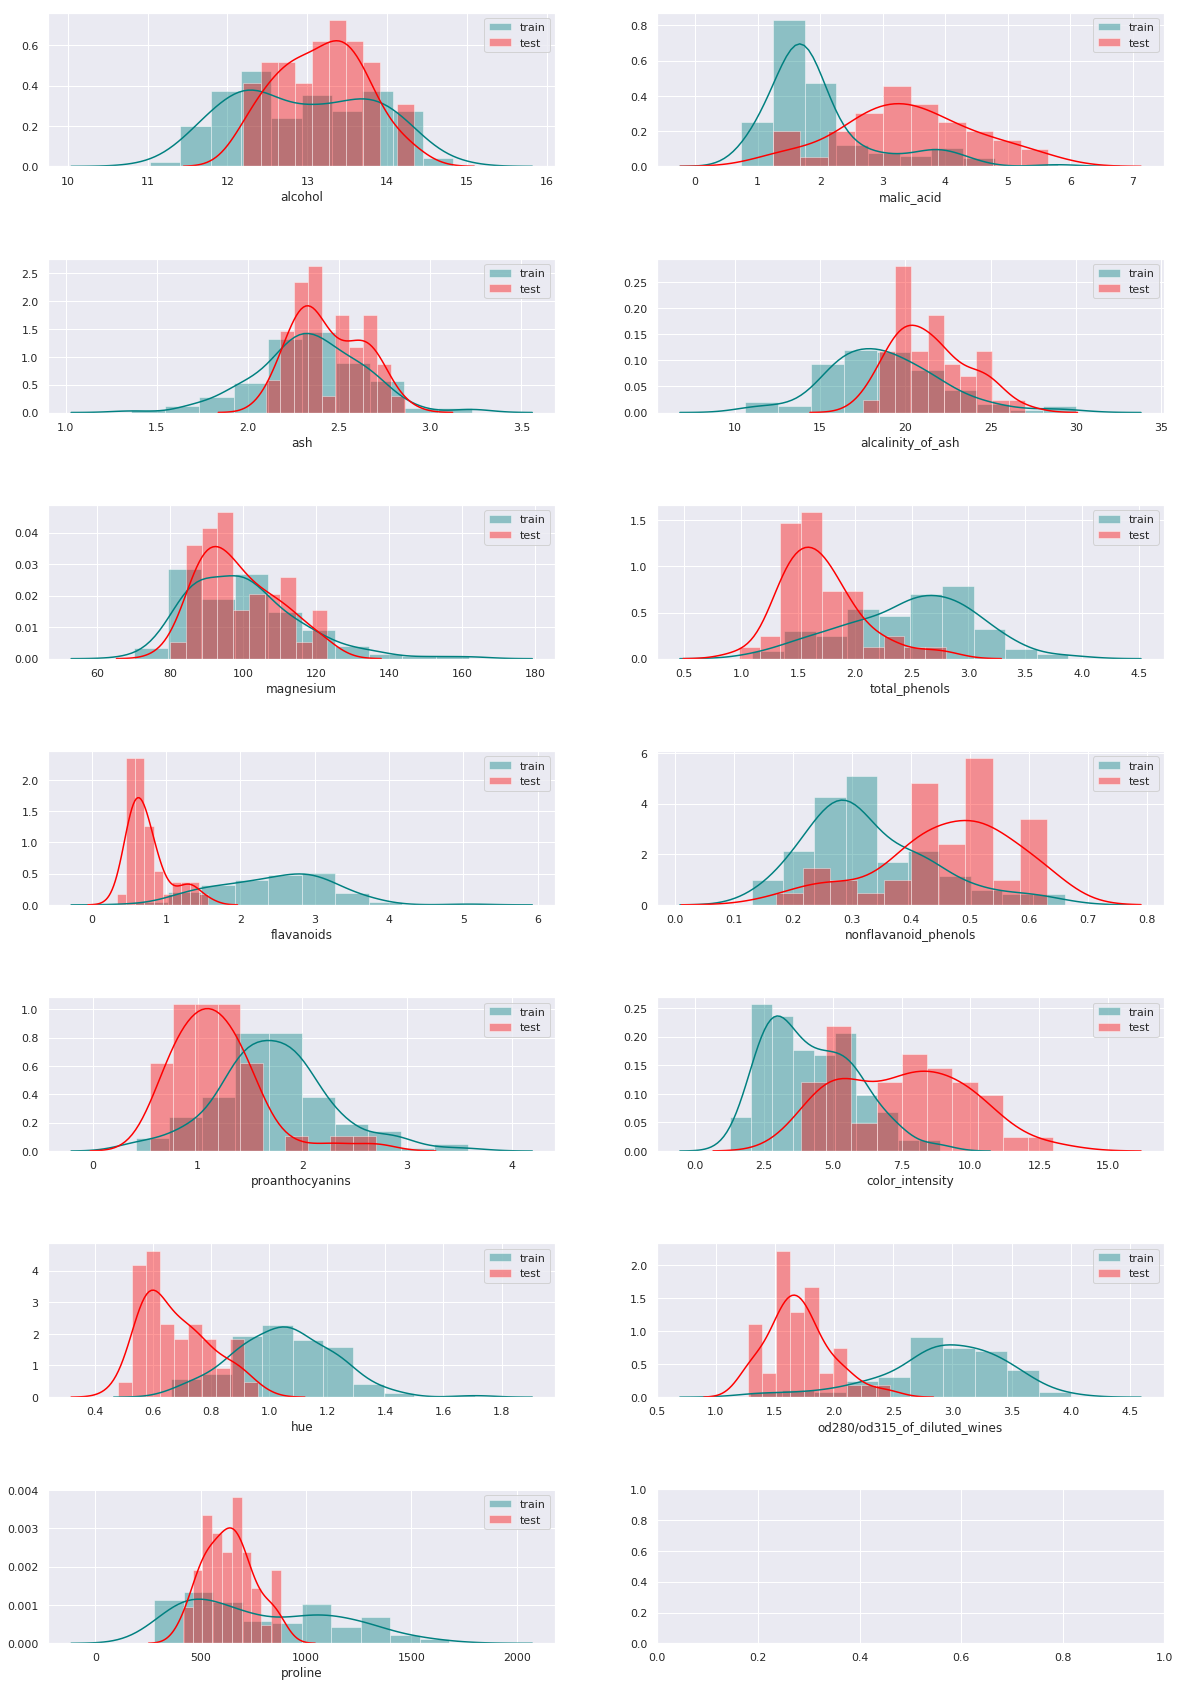

In [19]:
fig, axs = plt.subplots(7, 2, figsize=(20, 30))
plt.subplots_adjust(wspace=0.2, hspace=0.6)
axs = axs.ravel()

for i, feat_name in enumerate(X.columns):
    sns.distplot(X_train[feat_name], ax=axs[i], color='teal', bins=10, label='train')
    sns.distplot(X_test[feat_name],  ax=axs[i], color='red',     bins=10, label='test')
    axs[i].legend()

---> 見ての通り、かなり分布に違いがある。  
---> コルモゴロフスミルノフ検定を使ってどの程度差があるのか数値で表してみる。

# Kolmogorov–Smirnov_test
## 実際に K-S検定を行ってみる

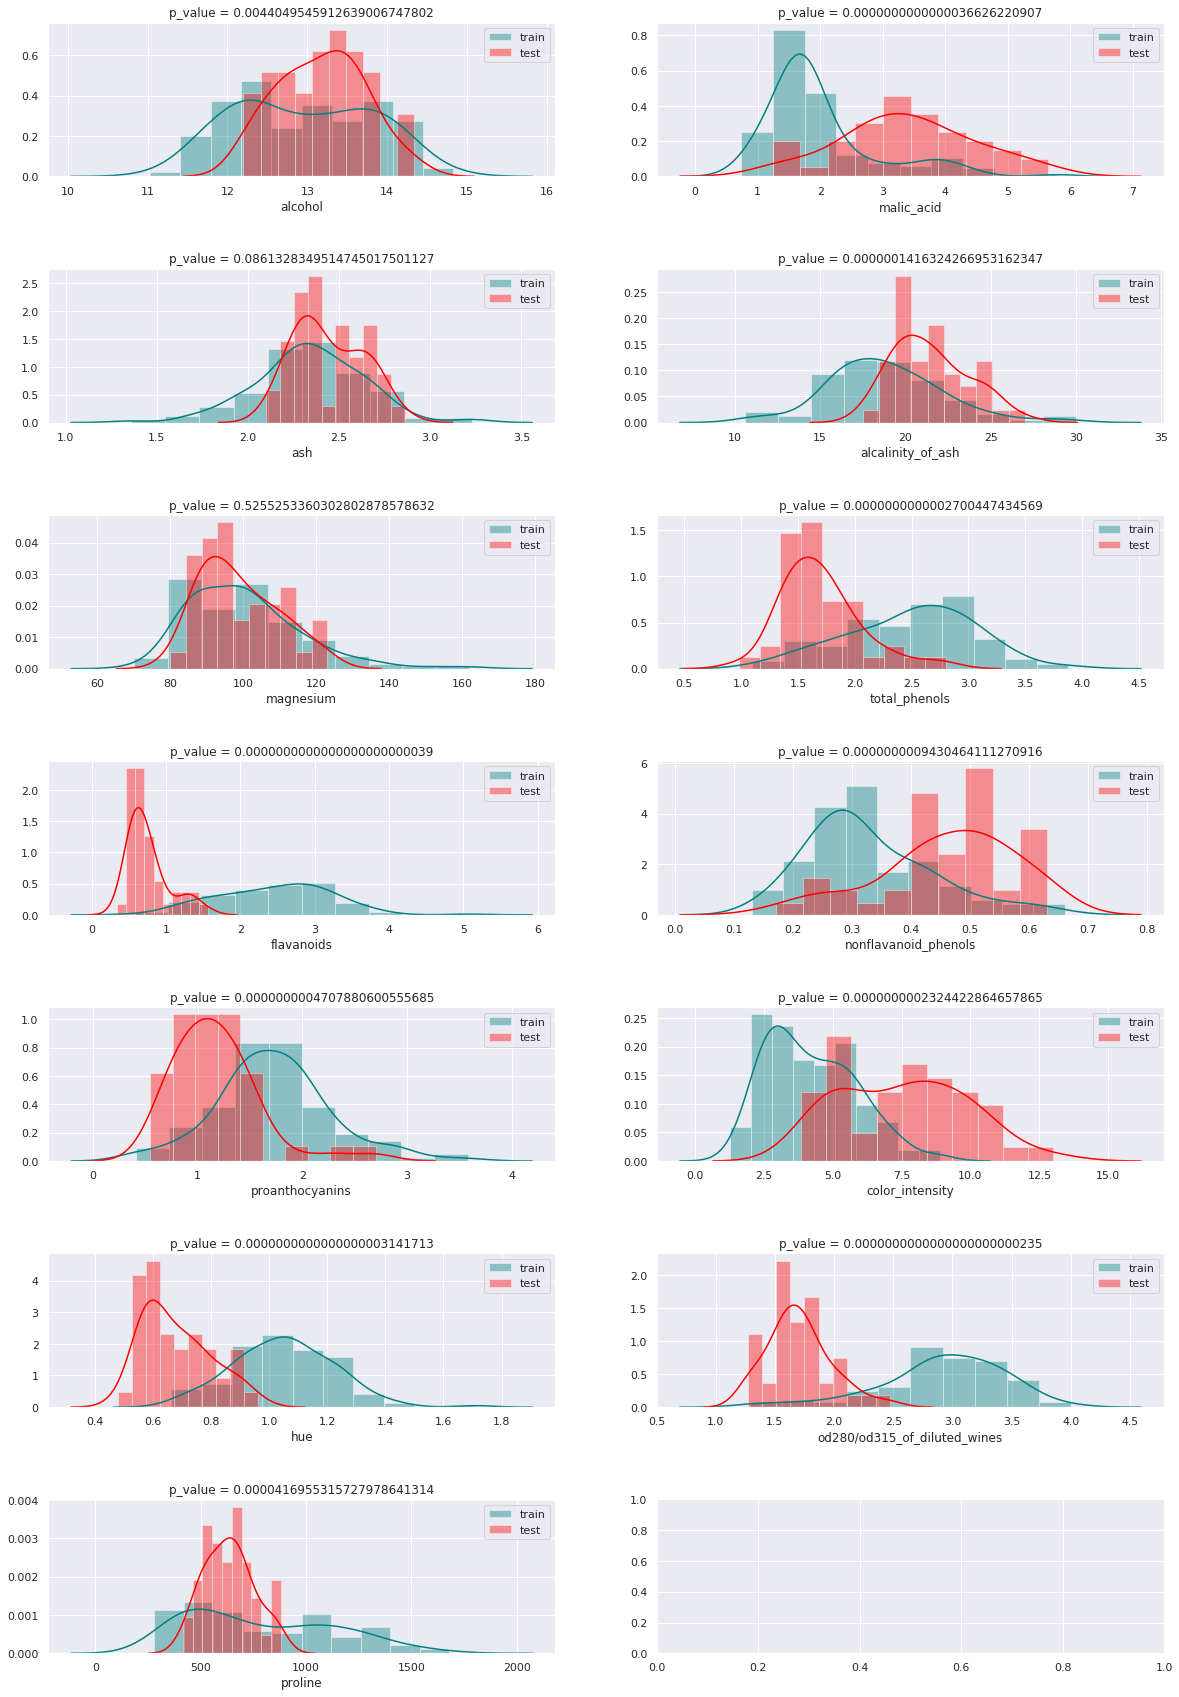

In [23]:
fig, axs = plt.subplots(7, 2, figsize=(20, 30))
plt.subplots_adjust(wspace=0.2, hspace=0.6)
axs = axs.ravel()

for i, feat_name in enumerate(X.columns):
    # 検定を行う
    p_value = ks_2samp(X_test[feat_name], X_train[feat_name])[1]
    
    sns.distplot(X_train[feat_name], ax=axs[i], color='teal', bins=10, label='train')
    sns.distplot(X_test[feat_name],  ax=axs[i], color='red',     bins=10, label='test')
    axs[i].set_title(f'p_value = {p_value :.25f}')
    axs[i].legend()

---> 分布に差があるものほど、p値も小さくなっていることがわかる。

## shuffle = True にするとどうなるか 

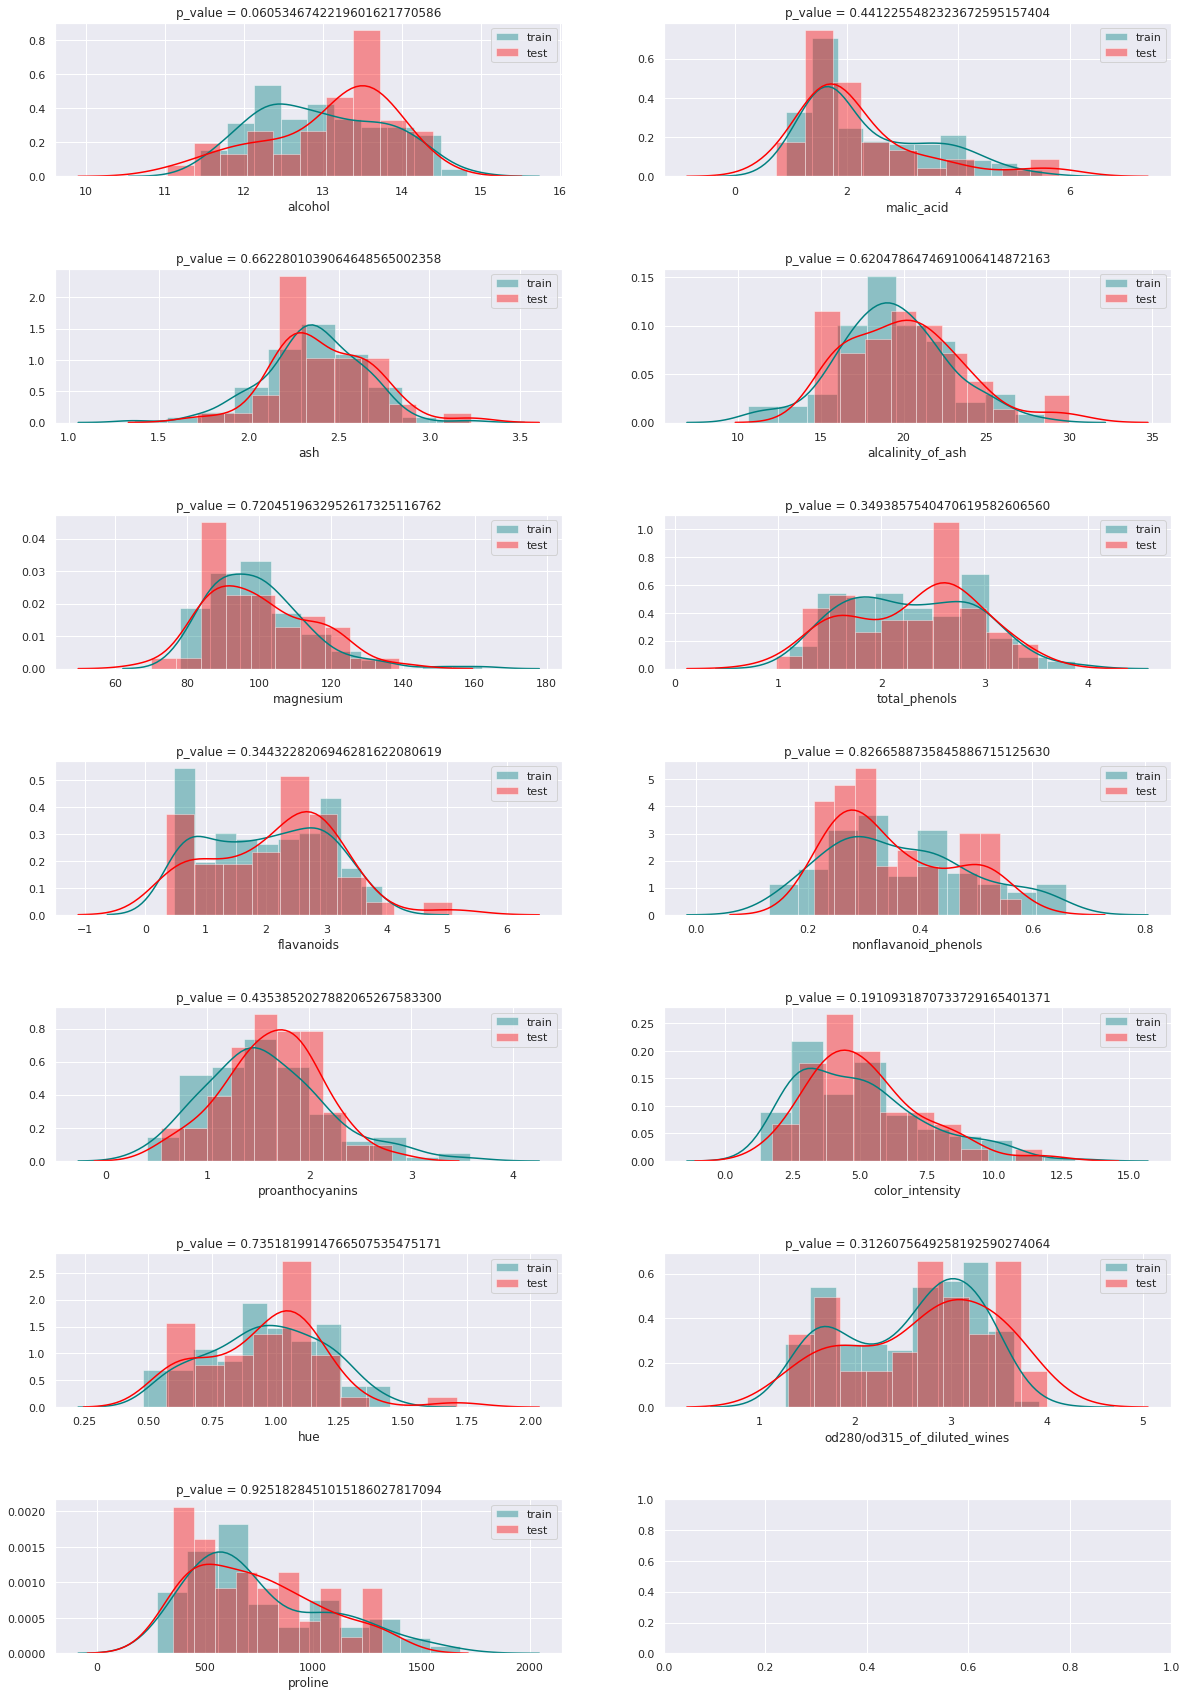

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)
fig, axs = plt.subplots(7, 2, figsize=(20, 30))
plt.subplots_adjust(wspace=0.2, hspace=0.6)
axs = axs.ravel()

for i, feat_name in enumerate(X.columns):
    # 検定を行う
    p_value = ks_2samp(X_test[feat_name], X_train[feat_name])[1]
    
    sns.distplot(X_train[feat_name], ax=axs[i], color='teal', bins=10, label='train')
    sns.distplot(X_test[feat_name],  ax=axs[i], color='red',     bins=10, label='test')
    axs[i].set_title(f'p_value = {p_value :.25f}')
    axs[i].legend()

---> 優位水準 0.05 % とすると、すべての特徴量で帰無仮説を棄却しない